# MyCoast NY Data Wrangling
Author: Mark Bauer  

Source: https://mycoast.org/ny  
Download: https://mycoast.org/download-data

In [1]:
# importing libraries
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib,seaborn

printing packages and versions:

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
geopandas : 0.11.1
matplotlib: 3.5.2
seaborn   : 0.11.2



In [3]:
# list files in directory
%ls

MyCoast export 2024-03-10 1-1200.csv
MyCoast export 2024-03-10 1201-1724.csv
README.md
analysis.ipynb


In [4]:
# read in both sheets
sheet_one = pd.read_csv('MyCoast export 2024-03-10 1-1200.csv')
sheet_two = pd.read_csv('MyCoast export 2024-03-10 1201-1724.csv')

print('sheet one shape: {}'.format(sheet_one.shape))
print('sheet two shape: {}'.format(sheet_two.shape))

sheet one shape: (1200, 56)
sheet two shape: (524, 50)


In [5]:
# preview data
sheet_one.head()

,ID #,reportType,photo_date,photo_time,from_device,AuthorName,AuthorEmail,URL,images,location_longitude,...,beach_comments,structure_damage,structures_comments,response_other,road_damage_detail,beach_damage_detail,response_damage,structure_damage_detail,buildings_damage_detail,amazonS3_cache
0,157349,Flood Watch,2024-03-10,11:04 am,Android 14,NaN,NaN,https://mycoast.org/reports/157349,https://report-images.nyc3.digitaloceanspaces....,-73.830003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157223,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,NaN,NaN,https://mycoast.org/reports/157223,https://report-images.nyc3.digitaloceanspaces....,-73.773479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157229,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,NaN,NaN,https://mycoast.org/reports/157229,https://report-images.nyc3.digitaloceanspaces....,-73.773509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157530,Flood Watch,2024-03-10,9:30 am,iOS 17.4,NaN,NaN,https://mycoast.org/reports/157530,https://report-images.nyc3.digitaloceanspaces....,-73.769652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157069,Storm,2024-03-10,8:51 am,Android 14,NaN,NaN,https://mycoast.org/reports/157069,https://report-images.nyc3.digitaloceanspaces....,-74.116586,...,NaN,No Impacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# summary of data
sheet_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1200 non-null   int64  
 1   reportType                       1200 non-null   object 
 2   photo_date                       1200 non-null   object 
 3   photo_time                       1200 non-null   object 
 4   from_device                      1106 non-null   object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              1200 non-null   object 
 8   images                           1165 non-null   object 
 9   location_longitude               1200 non-null   float64
 10  location_latitude                1200 non-null   float64
 11  geo_administrative_area_level_1  1200 non-null   object 
 12  geo_administrative_a

In [7]:
sheet_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             524 non-null    int64  
 1   reportType                       524 non-null    object 
 2   photo_date                       524 non-null    object 
 3   photo_time                       524 non-null    object 
 4   from_device                      516 non-null    object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              524 non-null    object 
 8   images                           524 non-null    object 
 9   location_longitude               524 non-null    float64
 10  location_latitude                524 non-null    float64
 11  geo_administrative_area_level_1  524 non-null    object 
 12  geo_administrative_are

In [8]:
# mismatch of columns, find columns in both sheets
sheet_one.columns.isin(sheet_two.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [9]:
# retrieve only columns in both sheets
cols = sheet_one.columns[sheet_one.columns.isin(sheet_two.columns)]

sheet_one = sheet_one.loc[:, cols]
sheet_two = sheet_two.loc[:, cols]

In [10]:
# preview new sheet
sheet_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1200 non-null   int64  
 1   reportType                       1200 non-null   object 
 2   photo_date                       1200 non-null   object 
 3   photo_time                       1200 non-null   object 
 4   from_device                      1106 non-null   object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              1200 non-null   object 
 8   images                           1165 non-null   object 
 9   location_longitude               1200 non-null   float64
 10  location_latitude                1200 non-null   float64
 11  geo_administrative_area_level_1  1200 non-null   object 
 12  geo_administrative_a

In [11]:
# preview new sheet
sheet_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             524 non-null    int64  
 1   reportType                       524 non-null    object 
 2   photo_date                       524 non-null    object 
 3   photo_time                       524 non-null    object 
 4   from_device                      516 non-null    object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              524 non-null    object 
 8   images                           524 non-null    object 
 9   location_longitude               524 non-null    float64
 10  location_latitude                524 non-null    float64
 11  geo_administrative_area_level_1  524 non-null    object 
 12  geo_administrative_are

In [12]:
# concatenate them together
df = pd.concat([sheet_one, sheet_two], axis=0, ignore_index=True)

print(df.shape)
df.head()

(1724, 50)


,ID #,reportType,photo_date,photo_time,from_device,AuthorName,AuthorEmail,URL,images,location_longitude,...,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,hazmat_comments,beach_damage,beach_comments,structure_damage,structures_comments,response_other
0,157349,Flood Watch,2024-03-10,11:04 am,Android 14,NaN,NaN,https://mycoast.org/reports/157349,https://report-images.nyc3.digitaloceanspaces....,-73.830003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157223,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,NaN,NaN,https://mycoast.org/reports/157223,https://report-images.nyc3.digitaloceanspaces....,-73.773479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157229,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,NaN,NaN,https://mycoast.org/reports/157229,https://report-images.nyc3.digitaloceanspaces....,-73.773509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157530,Flood Watch,2024-03-10,9:30 am,iOS 17.4,NaN,NaN,https://mycoast.org/reports/157530,https://report-images.nyc3.digitaloceanspaces....,-73.769652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157069,Storm,2024-03-10,8:51 am,Android 14,NaN,NaN,https://mycoast.org/reports/157069,https://report-images.nyc3.digitaloceanspaces....,-74.116586,...,No Impacts,NaN,NaN,None,NaN,Accessible,NaN,No Impacts,NaN,NaN


In [13]:
# summary of dataframe (i.e. df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1724 non-null   int64  
 1   reportType                       1724 non-null   object 
 2   photo_date                       1724 non-null   object 
 3   photo_time                       1724 non-null   object 
 4   from_device                      1622 non-null   object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              1724 non-null   object 
 8   images                           1689 non-null   object 
 9   location_longitude               1724 non-null   float64
 10  location_latitude                1724 non-null   float64
 11  geo_administrative_area_level_1  1724 non-null   object 
 12  geo_administrative_a

In [14]:
# drop columns that are all null values
cols = df.columns[df.notnull().any()]
df = df.loc[:, cols]

print(df.shape)
df.head()

(1724, 44)


,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
0,157349,Flood Watch,2024-03-10,11:04 am,Android 14,https://mycoast.org/reports/157349,https://report-images.nyc3.digitaloceanspaces....,-73.830003,40.653240,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157223,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,https://mycoast.org/reports/157223,https://report-images.nyc3.digitaloceanspaces....,-73.773479,40.595325,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157229,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,https://mycoast.org/reports/157229,https://report-images.nyc3.digitaloceanspaces....,-73.773509,40.595267,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157530,Flood Watch,2024-03-10,9:30 am,iOS 17.4,https://mycoast.org/reports/157530,https://report-images.nyc3.digitaloceanspaces....,-73.769652,40.596669,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157069,Storm,2024-03-10,8:51 am,Android 14,https://mycoast.org/reports/157069,https://report-images.nyc3.digitaloceanspaces....,-74.116586,40.554978,NY,...,0.0,0.0,No Impacts,NaN,NaN,None,Accessible,NaN,No Impacts,NaN


In [15]:
# summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1724 non-null   int64  
 1   reportType                       1724 non-null   object 
 2   photo_date                       1724 non-null   object 
 3   photo_time                       1724 non-null   object 
 4   from_device                      1622 non-null   object 
 5   URL                              1724 non-null   object 
 6   images                           1689 non-null   object 
 7   location_longitude               1724 non-null   float64
 8   location_latitude                1724 non-null   float64
 9   geo_administrative_area_level_1  1724 non-null   object 
 10  geo_administrative_area_level_2  1708 non-null   object 
 11  geo_locality                     374 non-null    object 
 12  geo_neighborhood    

# Capturing records only in NYC

In [16]:
# Examine county column
df.iloc[:, 7:].head()

,location_longitude,location_latitude,geo_administrative_area_level_1,geo_administrative_area_level_2,geo_locality,geo_neighborhood,geo_route,weather_temperature,weather_windSpeed,weather_windBearing,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
0,-73.830003,40.653240,NY,Queens County,NaN,Jamaica,Davenport Ct,49.7,21.4,308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.773479,40.595325,NY,Queens County,NaN,Far Rockaway,Beach 42nd St,44.0,16.1,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-73.773509,40.595267,NY,Queens County,NaN,Far Rockaway,Beach 42nd St,44.0,16.1,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-73.769652,40.596669,NY,Queens County,NaN,Far Rockaway,Beach 37th St,48.7,20.2,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-74.116586,40.554978,NY,Richmond County,NaN,Oakwood,Mill Rd,44.0,15.0,270.0,...,0.0,0.0,No Impacts,NaN,NaN,None,Accessible,NaN,No Impacts,NaN


In [17]:
# examine distribution of records per county
df['geo_administrative_area_level_2'].value_counts(dropna=False)

Queens County         1098
Bronx County           178
Suffolk County         160
Dutchess County         66
Kings County            55
Ulster County           53
Nassau County           20
Albany County           16
NaN                     16
Richmond County         15
Onondaga County         10
Greene County            7
Westchester County       6
Putnam County            6
New York County          3
Cortland County          3
Rockland County          2
Orange County            2
Delaware County          2
Columbia County          1
Oswego County            1
Monroe County            1
Erie County              1
Tompkins County          1
Jefferson County         1
Name: geo_administrative_area_level_2, dtype: int64

In [18]:
# read in boros shapes
path = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
nyc_boros = gpd.read_file(path)

nyc_boros

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1.0,Manhattan,6.365205e+08,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2.0,Bronx,1.187175e+09,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3.0,Brooklyn,1.934138e+09,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


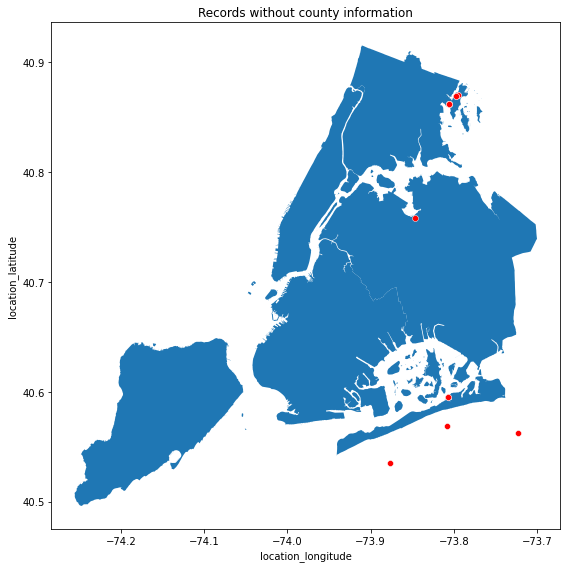

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=df.loc[df['geo_administrative_area_level_2'].isnull()],
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

plt.title('Records without county information')

plt.tight_layout()

The records are located in Queens and the Bronx, and a few seem to be in the water. Let's drop these for now and review later.

In [20]:
counties_nyc = [
    'Queens County',
    'Bronx County',
    'New York County',
    'Richmond County',
    'Kings County'
]

df = (
    df
    .loc[df['geo_administrative_area_level_2'].isin(counties_nyc)]
    .reset_index(drop=True)
)

print(df.shape)
df.head()

(1349, 44)


,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
0,157349,Flood Watch,2024-03-10,11:04 am,Android 14,https://mycoast.org/reports/157349,https://report-images.nyc3.digitaloceanspaces....,-73.830003,40.653240,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157223,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,https://mycoast.org/reports/157223,https://report-images.nyc3.digitaloceanspaces....,-73.773479,40.595325,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157229,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,https://mycoast.org/reports/157229,https://report-images.nyc3.digitaloceanspaces....,-73.773509,40.595267,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157530,Flood Watch,2024-03-10,9:30 am,iOS 17.4,https://mycoast.org/reports/157530,https://report-images.nyc3.digitaloceanspaces....,-73.769652,40.596669,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157069,Storm,2024-03-10,8:51 am,Android 14,https://mycoast.org/reports/157069,https://report-images.nyc3.digitaloceanspaces....,-74.116586,40.554978,NY,...,0.0,0.0,No Impacts,NaN,NaN,None,Accessible,NaN,No Impacts,NaN


In [21]:
# examine distribution of records per county
df['geo_administrative_area_level_2'].value_counts(dropna=False)

Queens County      1098
Bronx County        178
Kings County         55
Richmond County      15
New York County       3
Name: geo_administrative_area_level_2, dtype: int64

# Examine source device

In [22]:
# distribution of records per device
df['from_device'].value_counts()

Can reports - Survey123    699
Can reports - Airtable     510
Android 14                  32
iOS 17.2.1                  11
Android 13                  10
iOS 17.3.1                   9
iOS 16.1.1                   9
iOS 16.3.1                   7
iOS 15.8                     6
iOS 17.1.1                   4
iOS 15.8.1                   4
iOS 16.1.2                   3
iOS 16.2                     2
iOS 15.6.1                   2
iOS 17.1.2                   1
iOS 16.6.1                   1
Android 11                   1
iOS 16.4.1                   1
iOS 17.4                     1
Android 5.1                  1
iOS 14.8                     1
Name: from_device, dtype: int64

Coming back to this later. Need more information.

# Brief exploratory data analysis
Examining the count of unique values per column as well as max values.

In [23]:
df.head()

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
0,157349,Flood Watch,2024-03-10,11:04 am,Android 14,https://mycoast.org/reports/157349,https://report-images.nyc3.digitaloceanspaces....,-73.830003,40.653240,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157223,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,https://mycoast.org/reports/157223,https://report-images.nyc3.digitaloceanspaces....,-73.773479,40.595325,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,157229,Flood Watch,2024-03-10,9:45 am,iOS 17.3.1,https://mycoast.org/reports/157229,https://report-images.nyc3.digitaloceanspaces....,-73.773509,40.595267,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,157530,Flood Watch,2024-03-10,9:30 am,iOS 17.4,https://mycoast.org/reports/157530,https://report-images.nyc3.digitaloceanspaces....,-73.769652,40.596669,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157069,Storm,2024-03-10,8:51 am,Android 14,https://mycoast.org/reports/157069,https://report-images.nyc3.digitaloceanspaces....,-74.116586,40.554978,NY,...,0.0,0.0,No Impacts,NaN,NaN,None,Accessible,NaN,No Impacts,NaN


In [24]:
df['reportType'].value_counts()

Flood Watch    1329
Storm            20
Name: reportType, dtype: int64

In [25]:
df['photo_date'].value_counts().head(20)

2019-10-10    54
2018-10-27    49
2019-09-29    44
2020-04-09    42
2020-05-07    42
2019-10-29    41
2019-10-11    40
2018-11-25    36
2020-05-06    35
2022-12-23    35
2019-08-29    33
2024-01-13    28
2021-03-28    27
2020-04-08    26
2019-09-30    26
2019-03-22    24
2021-10-09    23
2018-11-26    22
2021-06-24    22
2020-11-15    22
Name: photo_date, dtype: int64

In [26]:
df['photo_time'].value_counts().head(20)

04:00 pm    513
05:00 pm    156
12:00 am     31
10:00 am     10
08:00 am      9
09:30 am      7
09:00 pm      7
12:00 pm      6
10:15 am      6
09:15 am      6
11:00 am      6
10:10 am      6
10:30 am      5
06:00 pm      5
07:45 am      5
07:30 am      5
10:44 am      5
09:10 am      4
09:20 am      4
09:55 am      4
Name: photo_time, dtype: int64

In [27]:
# max values
df['weather_windSpeed'].sort_values(ascending=False).head(10)

423    37.4
103    36.2
40     35.6
41     33.3
424    32.7
136    31.2
11     31.1
354    31.1
426    30.8
425    30.8
Name: weather_windSpeed, dtype: float64

In [28]:
# max values
df['weather_calc_24hr_precip'].sort_values(ascending=False).head(10)

80      6.880
1098    3.395
1099    3.390
241     3.068
242     3.067
767     2.713
768     2.669
563     2.504
1268    2.307
1245    2.307
Name: weather_calc_24hr_precip, dtype: float64

In [29]:
df['guessCause'].value_counts()

Overland flooding (Nearby waterbody)              566
Storm drain (Water pooling near a storm drain)    141
Rainfall (Water pooling from direct rainfall)     138
Unsure                                             78
Other                                              11
Broken pipes/water main break                       2
Name: guessCause, dtype: int64

In [30]:
df['guessDepth'].value_counts()

6        111
4         82
8         63
5         63
0         57
2         50
3         48
10        32
12        26
7         24
1         23
1-6       21
16        21
18        19
15        11
24        10
20         9
12-24      8
9          7
6-12       6
11         3
8-12       3
5.5        2
17         2
0.5        2
<1         2
36         2
40         2
19         2
34         1
42         1
14         1
55         1
2          1
66         1
13         1
3.5        1
6.5        1
14.5       1
4.75       1
30         1
Name: guessDepth, dtype: int64

Need to clean up the depth values to numeric.

In [31]:
# max depths
(pd
 .to_numeric(df['guessDepth'], errors='coerce')
 .sort_values(ascending=False)
 .head(10)
)

228    66.0
229    55.0
76     42.0
127    40.0
126    40.0
75     36.0
230    36.0
77     34.0
54     30.0
379    24.0
Name: guessDepth, dtype: float64

# Examine images of highest guessed depth locations

In [32]:
# Top 10 Guessed Depths

cols = [
    'ID #', 'reportType', 'photo_date', 'photo_time', 'from_device', 'URL',
    'images', 'location_longitude', 'location_latitude', 'report_created', 'guessCause','guessDepth'
]

(df
 .assign(guessDepth_numeric=pd.to_numeric(df['guessDepth'], errors='coerce'))
 .sort_values(by='guessDepth_numeric', ascending=False)
 .head(10)
 .loc[:, cols]
)

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,report_created,guessCause,guessDepth
228,120189,Flood Watch,2021-09-01,10:16 pm,NaN,https://mycoast.org/reports/120189,https://report-images.nyc3.digitaloceanspaces....,-73.777905,40.710839,2023-06-21T23:41:29Z,Overland flooding (Nearby waterbody),66
229,120192,Flood Watch,2021-09-01,10:10 pm,NaN,https://mycoast.org/reports/120192,https://report-images.nyc3.digitaloceanspaces....,-73.777992,40.711299,2023-06-21T23:52:02Z,Rainfall (Water pooling from direct rainfall),55
76,155506,Flood Watch,2023-11-08,5:09 pm,iOS 16.3.1,https://mycoast.org/reports/155506,https://report-images.nyc3.digitaloceanspaces....,-74.114953,40.553407,2024-02-19T19:01:48Z,Overland flooding (Nearby waterbody),42
127,104363,Flood Watch,2022-12-23,07:30 am,NaN,https://mycoast.org/reports/104363,https://report-images.nyc3.digitaloceanspaces....,-73.830879,40.651790,2023-01-10T02:28:02Z,Overland flooding (Nearby waterbody),40
126,104360,Flood Watch,2022-12-23,07:30 am,NaN,https://mycoast.org/reports/104360,https://report-images.nyc3.digitaloceanspaces....,-73.835819,40.651086,2023-01-10T01:59:36Z,Overland flooding (Nearby waterbody),40
75,155438,Flood Watch,2023-11-08,5:09 pm,iOS 16.3.1,https://mycoast.org/reports/155438,https://report-images.nyc3.digitaloceanspaces....,-74.117468,40.556264,2024-02-17T18:13:28Z,Overland flooding (Nearby waterbody),36
230,136300,Flood Watch,2021-09-01,05:00 pm,Can reports - Survey123,https://mycoast.org/reports/136300,https://report-images.nyc3.digitaloceanspaces....,-74.142662,40.570579,2023-11-02T22:06:19Z,Rainfall (Water pooling from direct rainfall),36
77,155441,Flood Watch,2023-11-08,5:03 pm,iOS 16.3.1,https://mycoast.org/reports/155441,https://report-images.nyc3.digitaloceanspaces....,-74.113291,40.557297,2024-02-17T18:19:37Z,Overland flooding (Nearby waterbody),34
54,149490,Flood Watch,2024-01-13,10:15 am,Android 14,https://mycoast.org/reports/149490,https://report-images.nyc3.digitaloceanspaces....,-73.830026,40.653515,2024-01-13T15:27:44Z,Overland flooding (Nearby waterbody),30
379,138797,Flood Watch,2020-12-17,05:00 pm,Can reports - Survey123,https://mycoast.org/reports/138797,https://report-images.nyc3.digitaloceanspaces....,-73.852364,40.661616,2023-11-03T10:49:18Z,NaN,24


In [33]:
highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(1)
    .index
)

highest_depth_df = df.iloc[highest_depth]

highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
228,120189,Flood Watch,2021-09-01,10:16 pm,NaN,https://mycoast.org/reports/120189,https://report-images.nyc3.digitaloceanspaces....,-73.777905,40.710839,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


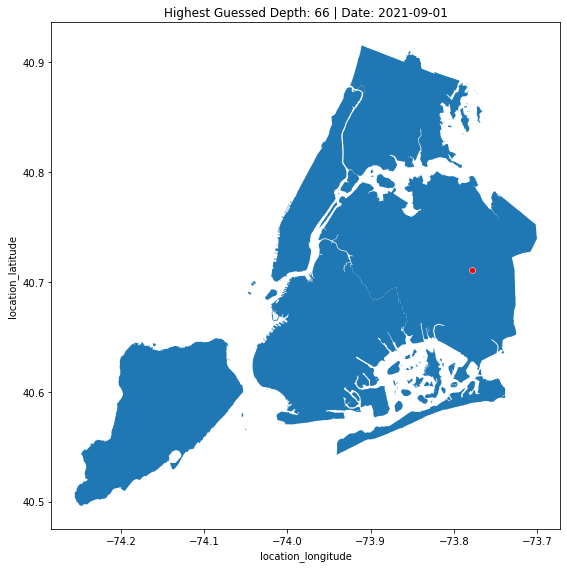

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = highest_depth_df['guessDepth'].values[0]
date = highest_depth_df['photo_date'].values[0]
plt.title('Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()

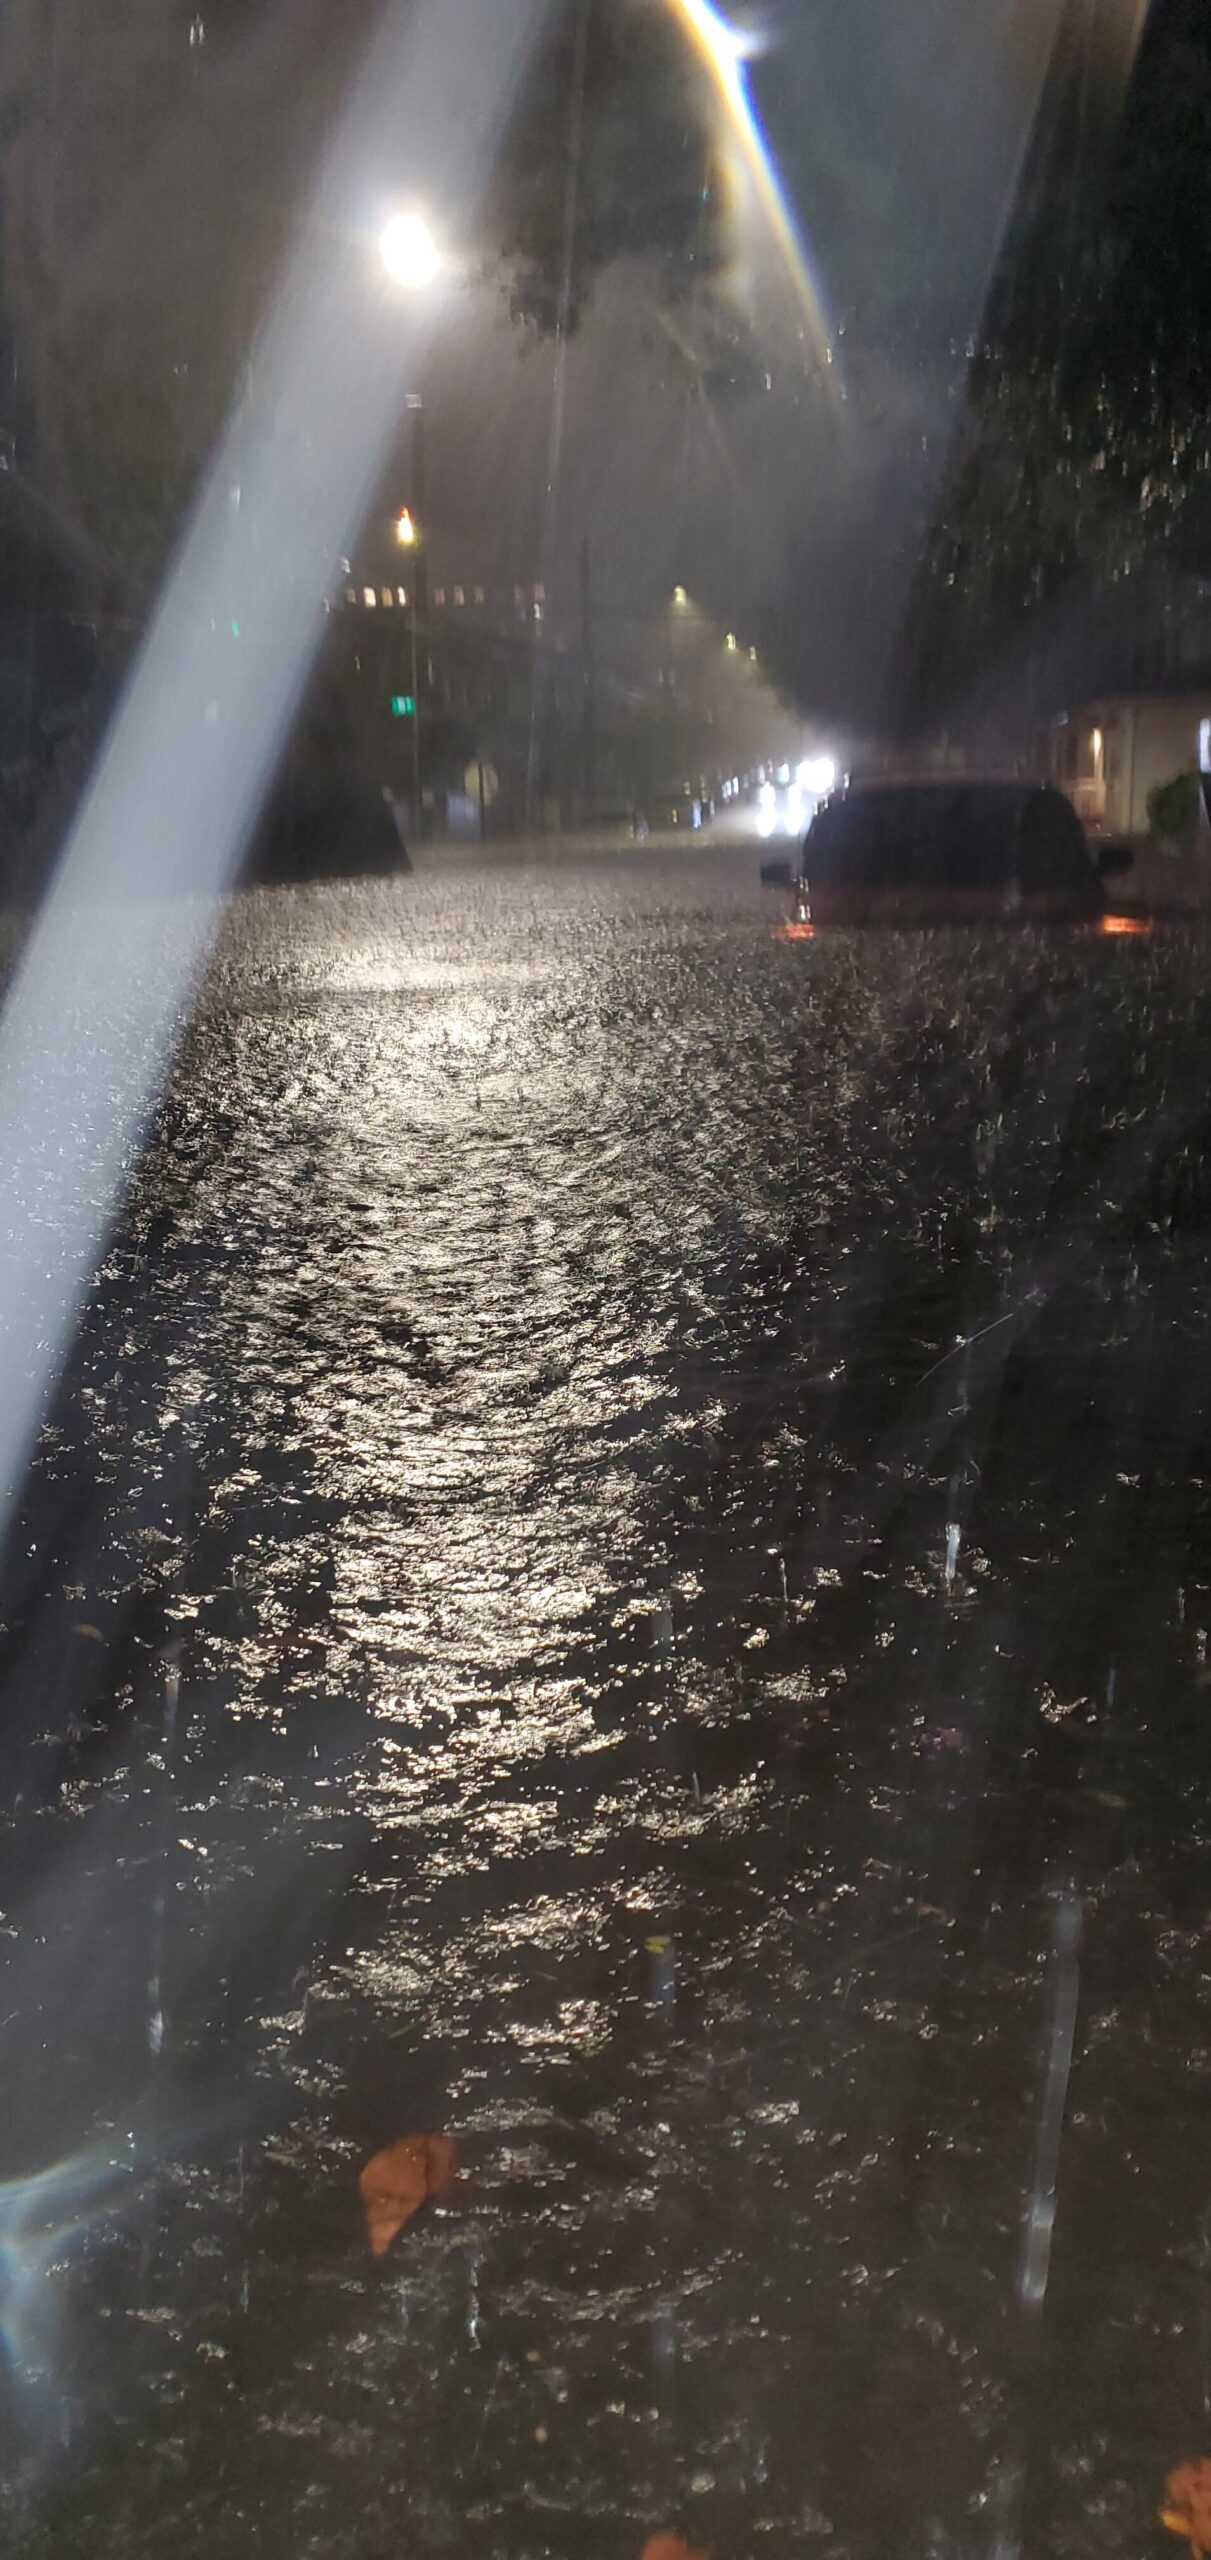

In [35]:
# plot highest depth image
url = highest_depth_df['images'].values[0]

IPython.display.Image(url, width=300)

In [36]:
second_highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(2)[1:]
    .index
)

second_highest_depth_df = df.iloc[second_highest_depth]

second_highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
229,120192,Flood Watch,2021-09-01,10:10 pm,NaN,https://mycoast.org/reports/120192,https://report-images.nyc3.digitaloceanspaces....,-73.777992,40.711299,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


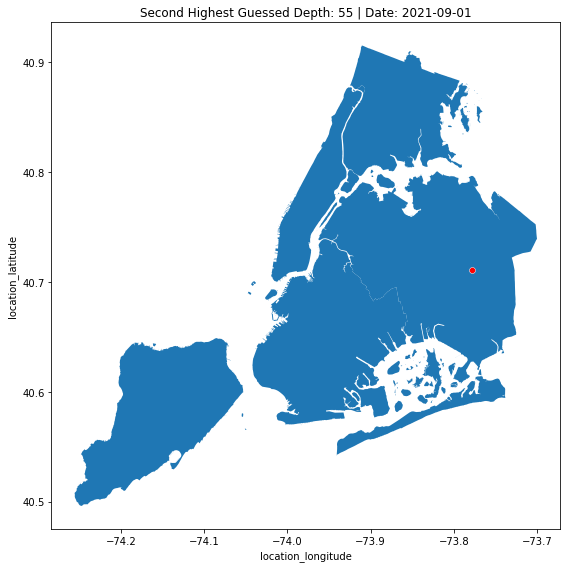

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=second_highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = second_highest_depth_df['guessDepth'].values[0]
date = second_highest_depth_df['photo_date'].values[0]
plt.title('Second Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()

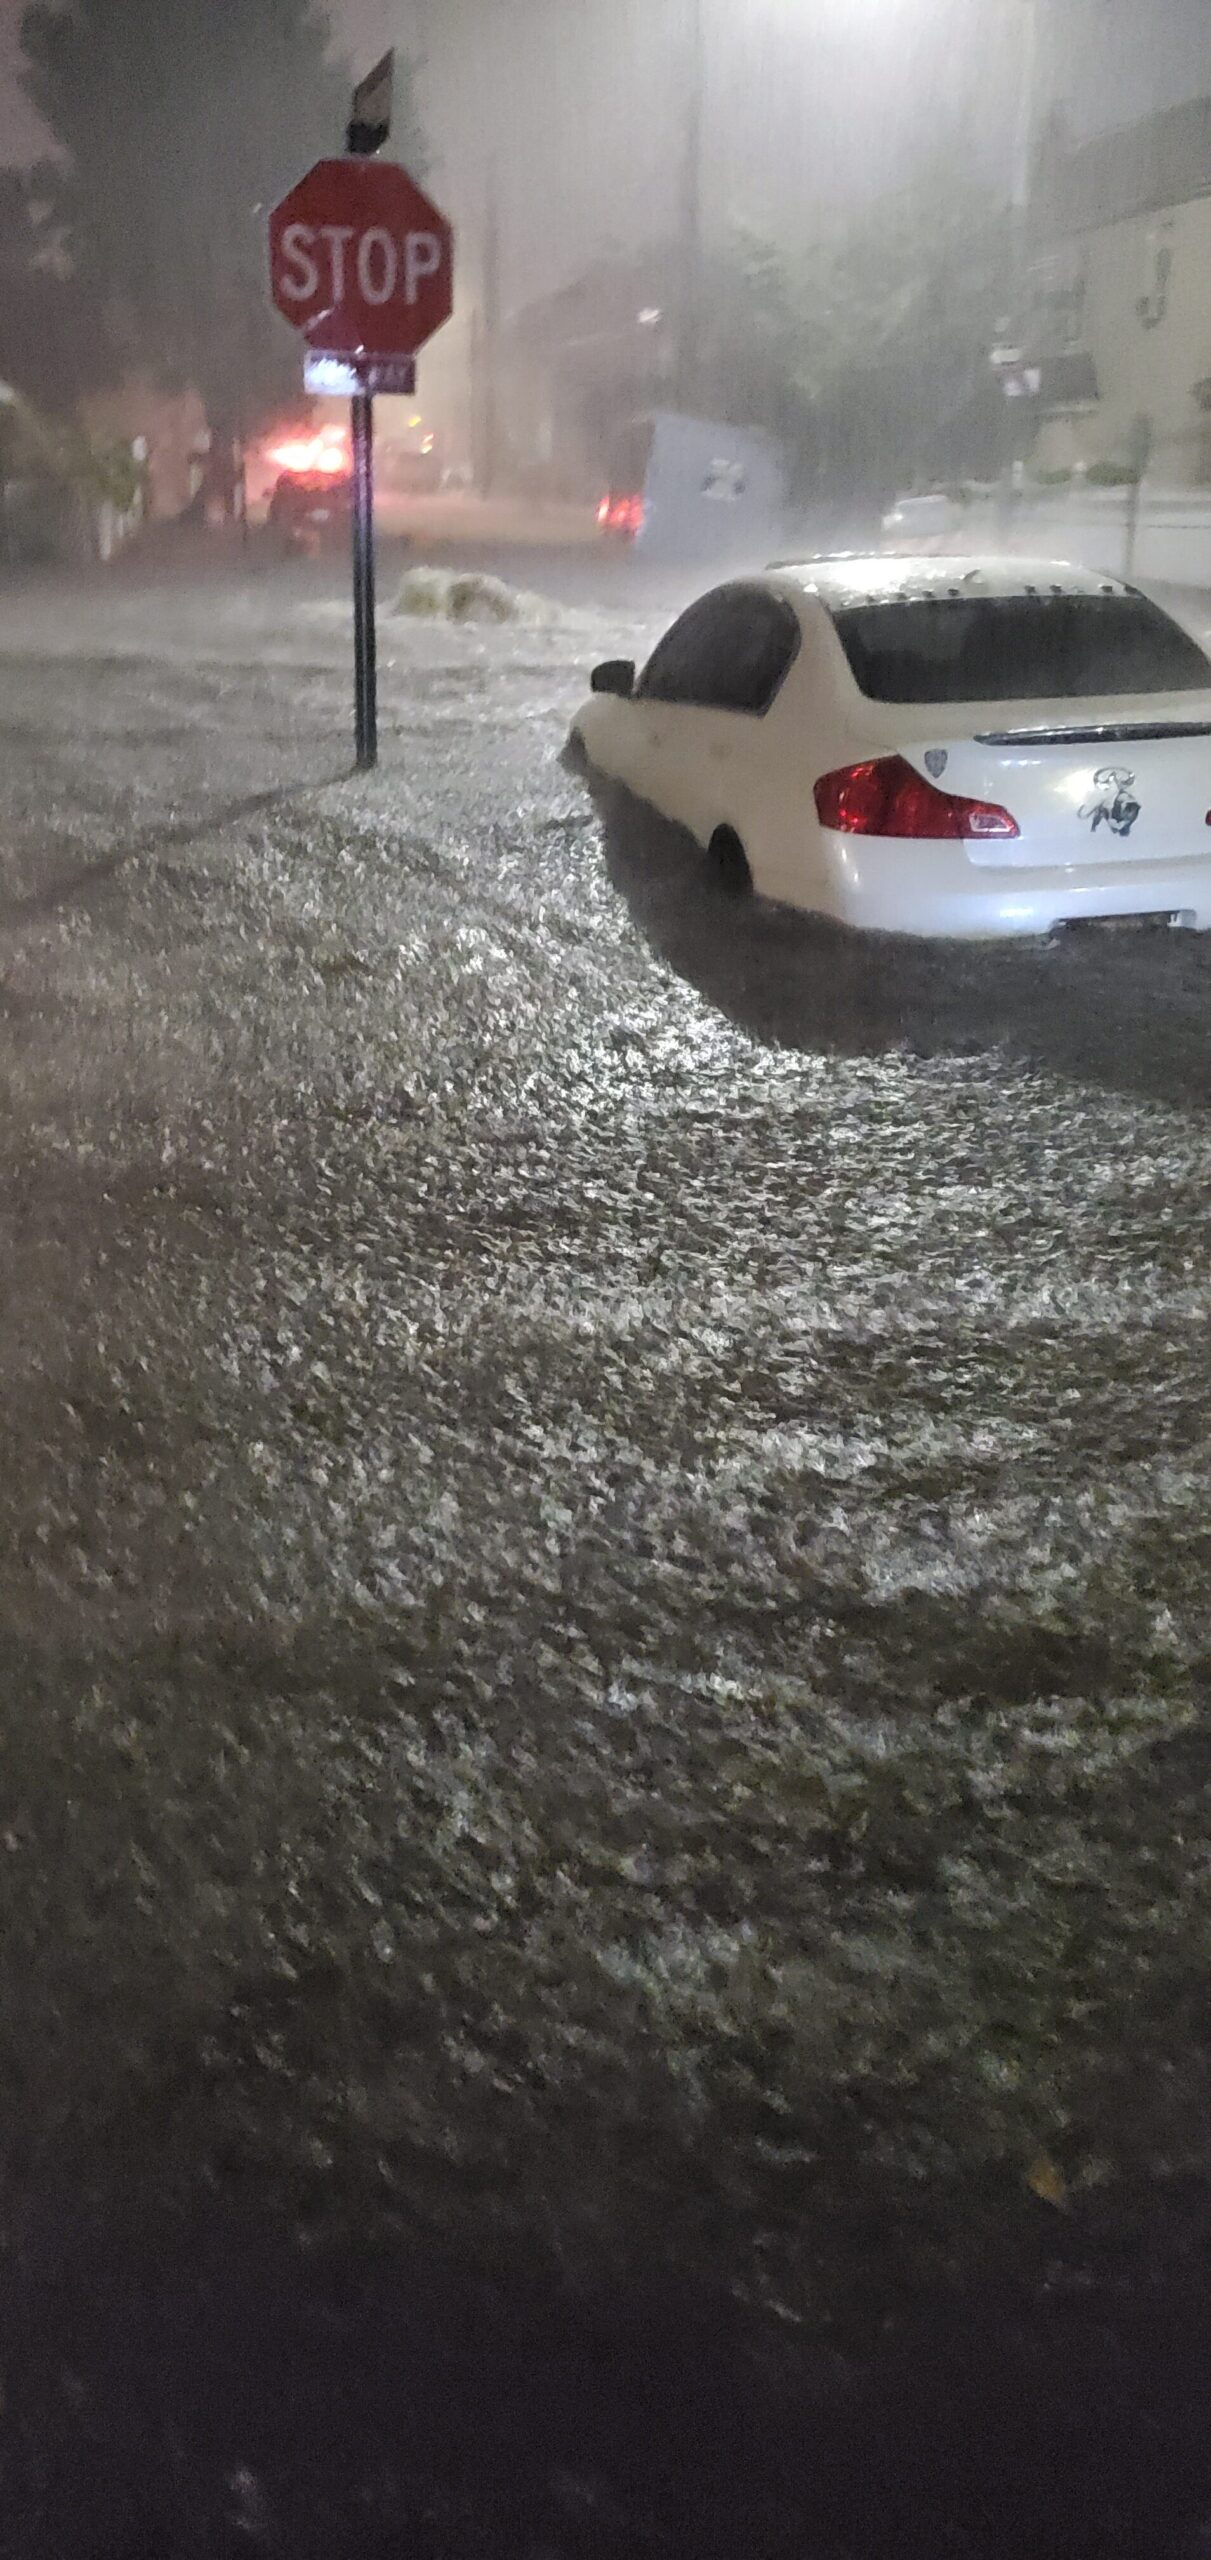

In [38]:
# plot second highest depth image
url = second_highest_depth_df['images'].values[0]

IPython.display.Image(url, width=300)

In [39]:
third_highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(3)[2:]
    .index
)

third_highest_depth_df = df.iloc[third_highest_depth]

third_highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
76,155506,Flood Watch,2023-11-08,5:09 pm,iOS 16.3.1,https://mycoast.org/reports/155506,https://report-images.nyc3.digitaloceanspaces....,-74.114953,40.553407,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


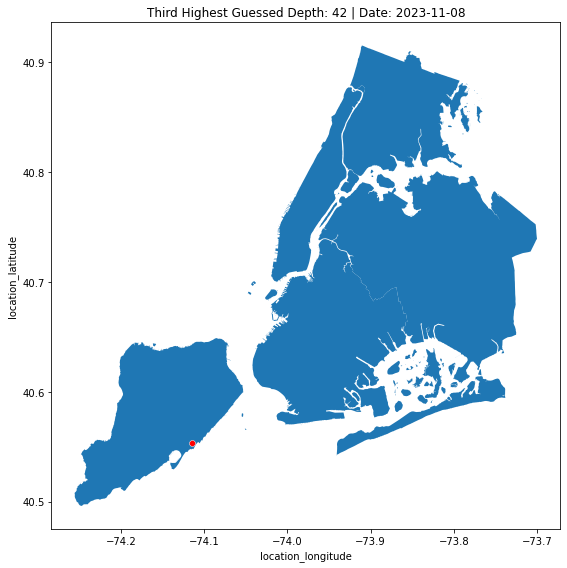

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=third_highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = third_highest_depth_df['guessDepth'].values[0]
date = third_highest_depth_df['photo_date'].values[0]
plt.title('Third Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()

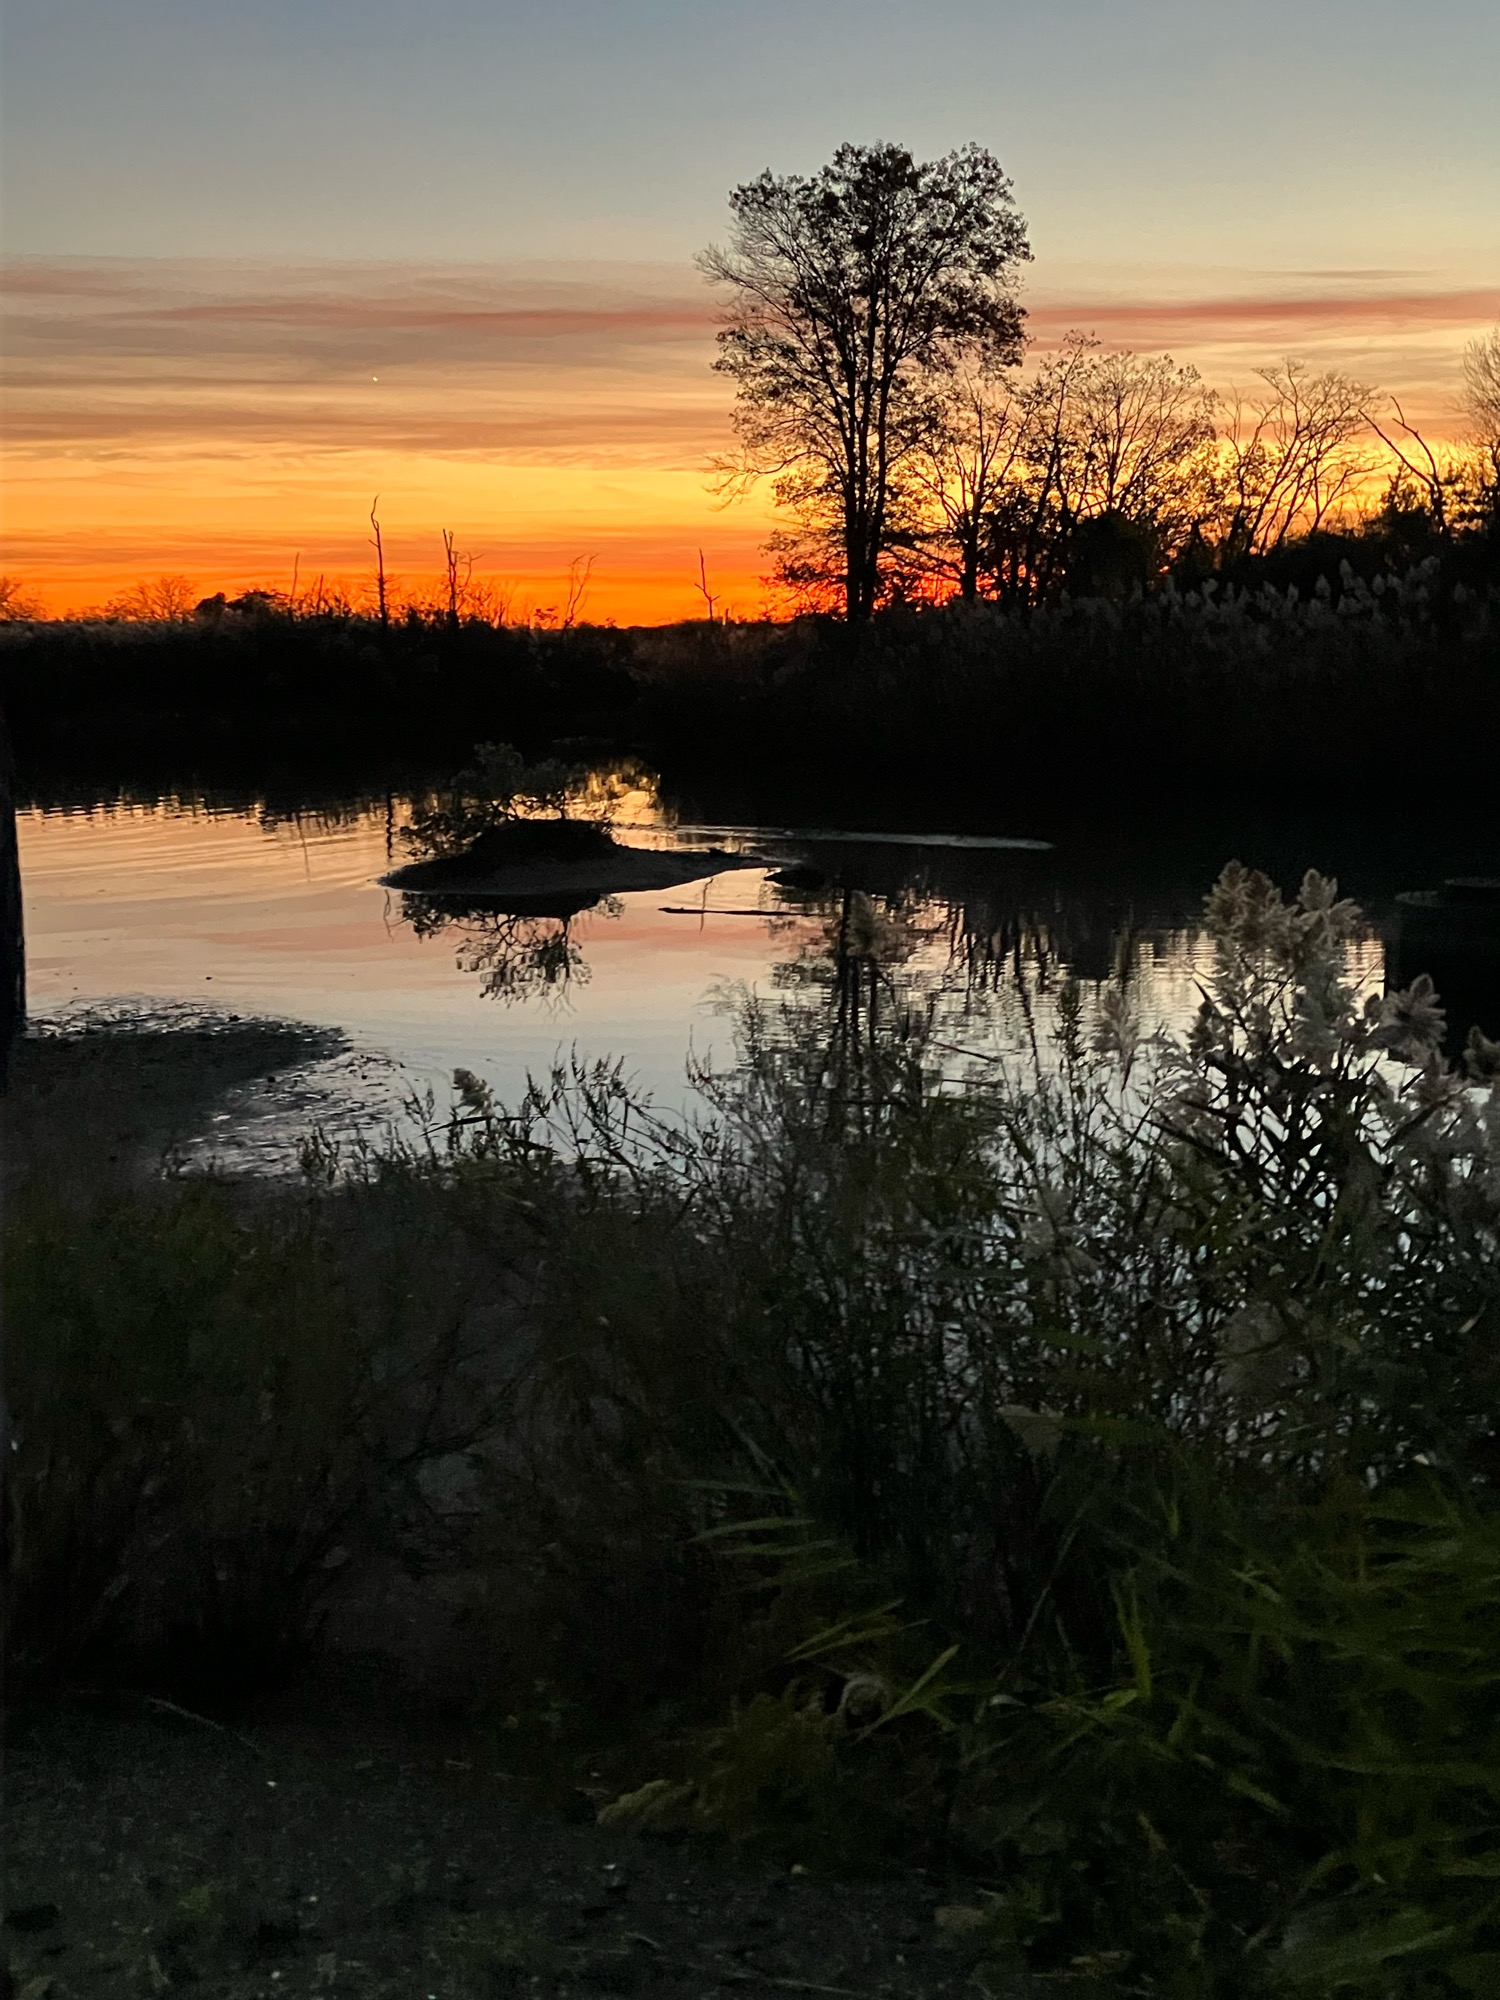

In [41]:
# plot third highest depth image
url = third_highest_depth_df['images'].values[0]

IPython.display.Image(url, width=300)

In [42]:
fourth_highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(4)[3:]
    .index
)

fourth_highest_depth_df = df.iloc[fourth_highest_depth]

fourth_highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,float_number,boat_number,buildings_damage,buildings_street,buildings_comments,hazmat_damage damage-cat,beach_damage,beach_comments,structure_damage,response_other
127,104363,Flood Watch,2022-12-23,07:30 am,NaN,https://mycoast.org/reports/104363,https://report-images.nyc3.digitaloceanspaces....,-73.830879,40.65179,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


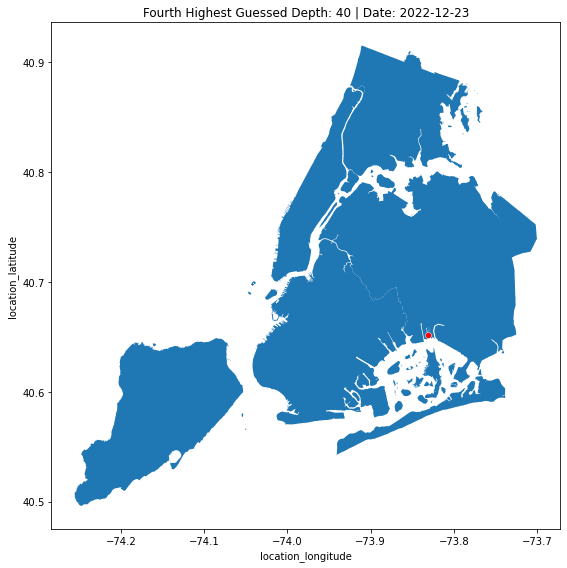

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=fourth_highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = fourth_highest_depth_df['guessDepth'].values[0]
date = fourth_highest_depth_df['photo_date'].values[0]
plt.title('Fourth Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()

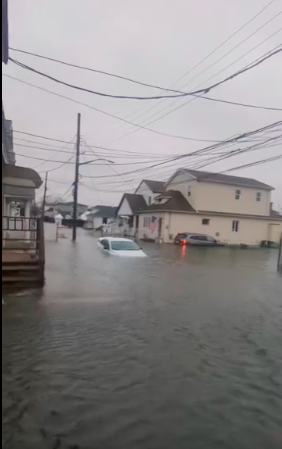

In [44]:
# plot second highest depth image
url = fourth_highest_depth_df['images'].values[0]

IPython.display.Image(url, width=300)